<a href="https://colab.research.google.com/github/drago467/AIVN/blob/master/Decision%20Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def compute_gini(dataset):
  p_sum = 0
  number_of_element = len(dataset)
  for i in set(dataset):
    p_i = (frequency(dataset, i) / number_of_element)
    p_sum += p_i**2
  gini = 1 - p_sum
  return gini

In [2]:
def frequency(dataset, element):
  count = 0
  for i in dataset:
    if i == element:
      count += 1
  return count

In [3]:
dataset = [1, 2, 4, 6, 7]

In [4]:
gini_value = compute_gini(dataset)
print(gini_value)

0.7999999999999999


In [5]:
import pandas as pd

In [23]:
# Defining a simple dataset
attribute_names = ['love_math', 'love_art', 'love_english']

class_name = 'love_ai'

data = {
    'love_math': ['yes', 'yes', 'no', 'no', 'yes', 'yes', 'no'],
    'love_art': ['yes', 'no', 'yes', 'yes', 'yes', 'no', 'no'],
    'love_english': ['no', 'no', 'yes', 'yes', 'yes', 'yes', 'yes'],
    'love_ai': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no']
}

df = pd.DataFrame(data, columns = data.keys())
print(df)

  love_math love_art love_english love_ai
0       yes      yes           no      no
1       yes       no           no      no
2        no      yes          yes     yes
3        no      yes          yes     yes
4       yes      yes          yes     yes
5       yes       no          yes      no
6        no       no          yes      no


In [7]:
class_value_counts = df[class_name].value_counts()
print(class_value_counts)

no     4
yes    3
Name: love_ai, dtype: int64


In [8]:
def gini_impurity(class_value_counts):
  n = class_value_counts.sum()
  p_sum = 0
  for key in class_value_counts.keys():
    p_sum = p_sum + (class_value_counts[key]/n)**2
  gini = 1 - p_sum
  return gini

In [9]:
gini_love_ai = gini_impurity(class_value_counts)
print(gini_love_ai)

0.48979591836734704


In [10]:
def compute_gini_with_given_condition(attribute_name):
  attribute_values = df[attribute_name].value_counts()

  n = df.shape[0]
  gini_total = 0
  for key in attribute_values.keys():
    df_k = df[class_name][df[attribute_name] == key].value_counts()
    n_k = attribute_values[key]
    gini_total = gini_total + (n_k / n) * gini_impurity(df_k)
  return gini_total

In [11]:
gini_love_math = compute_gini_with_given_condition('love_math')

gini_love_art = compute_gini_with_given_condition('love_art')

gini_love_english = compute_gini_with_given_condition('love_english')

In [12]:
gini_attribute = {}

for key in attribute_names:
  gini_attribute[key] = compute_gini_with_given_condition(key)
  print(f'Gini for {key} is {gini_attribute[key]: .3f}')

Gini for love_math is  0.405
Gini for love_art is  0.214
Gini for love_english is  0.343


In [18]:
min_value = min(gini_attribute.values())

print('The minimum value of Gini Impurity: {0:.3}'.format(min_value))
print('The maximum value of Gini Gain: {0:.3}'.format(0.49 - min_value))

selected_attribute = min(gini_attribute.keys())
print('The selected attribute is: ', selected_attribute)

The minimum value of Gini Impurity: 0.214
The maximum value of Gini Gain: 0.276
The selected attribute is:  love_art


In [21]:
df = df[df[selected_attribute] == 'yes']
df = df.drop(selected_attribute, 1)

attribute_names.remove(selected_attribute)
class_name = 'love_ai'

gini_attribute = {}
for key in attribute_names:
  gini_attribute[key] = compute_gini_with_given_condition(key)
  print(f'Gini for {key} is {gini_attribute[key]:.3f}')

Gini for love_math is 0.250
Gini for love_english is 0.000


<ipython-input-21-052bd335b659>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop(selected_attribute, 1)


In [27]:
from sklearn import tree

classifier = tree.DecisionTreeClassifier(criterion = 'gini',
                                         max_depth = 4,
                                         min_samples_leaf = 1)
one_hot_data = pd.get_dummies(df[['love_math', 'love_art', 'love_english']],
                              drop_first = True)

X = one_hot_data.iloc[:,:].values
y = df['love_ai'].values

classifier.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [28]:
print(one_hot_data)

   love_math_yes  love_art_yes  love_english_yes
0              1             1                 0
1              1             0                 0
2              0             1                 1
3              0             1                 1
4              1             1                 1
5              1             0                 1
6              0             0                 1


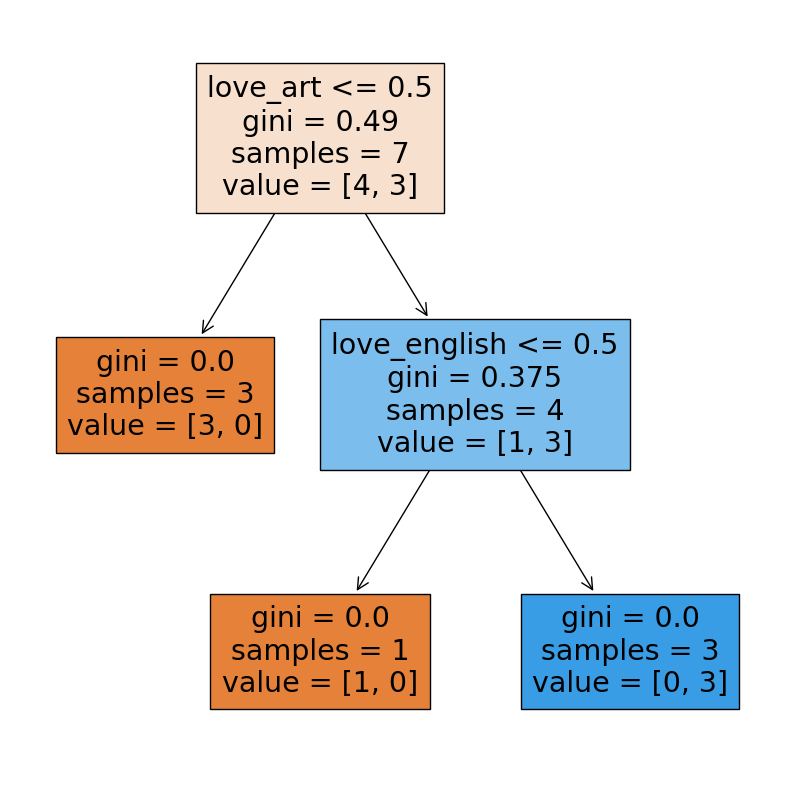

In [32]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize = (10, 10))
tree.plot_tree(classifier, ax = ax, feature_names = ['love_math', 'love_art',
                                                     'love_english'], filled = True);

In [35]:
from sklearn.datasets import load_iris

datasets = load_iris()
X = datasets.data
y = datasets.target

classifrier = tree.DecisionTreeClassifier(criterion = 'gini',
                                          max_depth = 10,
                                          min_samples_leaf = 10)
classifier.fit(X, y)

DecisionTreeClassifier(max_depth=4)

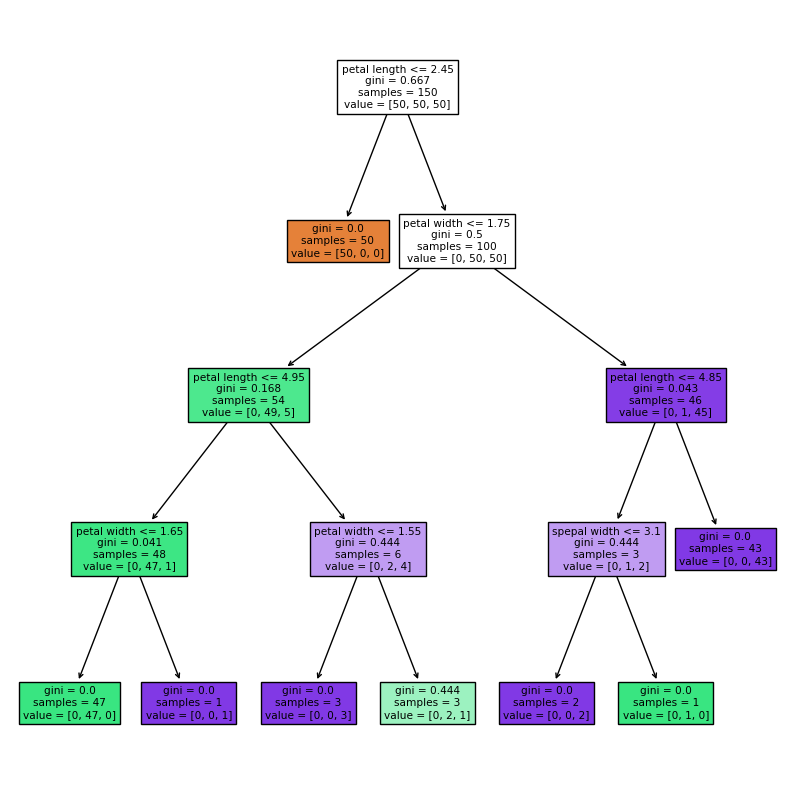

In [37]:
fig, ax = plt.subplots(figsize = (10, 10))
tree.plot_tree(classifier, ax = ax, feature_names = ['sepal length', 'spepal width',
                                                     'petal length', 'petal width'],
               filled = True);